
Problem Statement and Objective: A hospital readmission is when a patient who is discharged from the hospital, gets re-admitted again within a certain period of time. Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. For this reason, Centers for Medicare & Medicaid Services established the Hospital Readmissions Reduction Program which aims to improve quality of care for patients and reduce health care spending by applying payment penalties to hospitals that have more than expected readmission rates for certain conditions. Although diabetes is not yet included in the penalty measures, the program is regularly adding new disease conditions to the list, now totaling 6 for FY2018. In 2011, American hospitals spent over $41 billion on diabetic patients who got readmitted within 30 days of discharge. Being able to determine factors that lead to higher readmission in such patients, and correspondingly being able to predict which patients will get readmitted can help hospitals save millions of dollars while improving quality of care. So, with that background in mind, we used a medical claims dataset (description below), to answer these questions:

What factors are the strongest predictors of hospital readmission in diabetic patients?
How well can we predict hospital readmission in this dataset with limited features?


**Data Set Description**

VARIABLE NAMES: DESCRIPTION

**Encounter ID**: Unique identifier of an encounter

**Patient number**: Unique identifier of a patient

**Race Values**: Caucasian, Asian, African American, Hispanic, and other

**Gender Values**: male, female, and unknown/invalid

**Age**: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

**Weight**: Weight in pounds

**Admission type**: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

**Discharge disposition**: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

**Admission source**: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

**Time in hospital**: Integer number of days between admission and discharge

**Payer code**: Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

**Medical specialty**: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

**Number of lab procedures**: Number of lab tests performed during the encounter

**Number of procedures**: Numeric Number of procedures (other than lab tests) performed during the encounter

**Number of medications**: Number of distinct generic names administered during the encounter

**Number of outpatient visits**: Number of outpatient visits of the patient in the year preceding the encounter


**Number of emergency**: visits Number of emergency visits of the patient in the year preceding the encounter


**Number of inpatient visits**: Number of inpatient visits of the patient in the year preceding the encounter


**Diagnosis 1**: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values


**Diagnosis 2**: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values


**Diagnosis 3**: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values


**Number of diagnoses**: entered to the system 0%


**Glucose serum test result**: Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured


**A1c test result**: Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.


**Change of medications**: Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”


**Diabetes medications**: Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”


24 features for medications For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed


**Readmitted**: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

### Data preparation and Exploration

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (confusion_matrix, accuracy_score,f1_score,recall_score,mean_squared_error, r2_score, 
roc_auc_score, roc_curve, classification_report,precision_recall_fscore_support)
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data = pd.read_csv('/content/drive/My Drive/diabetic_data.csv')

In [6]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
data.shape

(101766, 50)

In [9]:
data.readmitted = [1 if each=='<30' else 0 for each in data.readmitted]

In [10]:
def cat(data, column, labels=[]):
    fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(12,5))
    sns.countplot(x=data[column], data=data, ax=ax[0])
    data[column].value_counts().plot.pie(labels=labels,autopct="%1.2f%%",explode = (0, 0.05))
    plt.show()

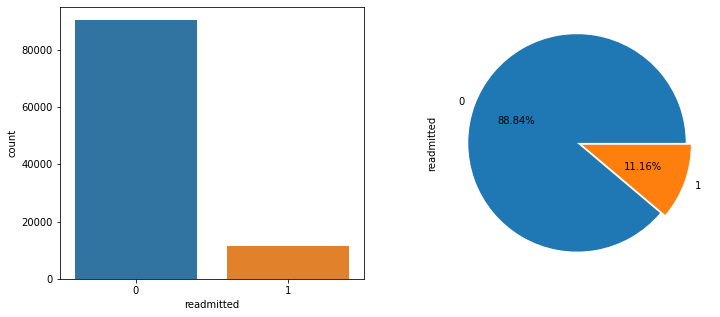

In [11]:
cat(data,'readmitted',labels=['0','1'])

In [12]:
data.replace('?', np.nan , inplace=True)

In [13]:
data.replace('Unknown/Ivalid', np.nan, inplace=True)

### Dealing with Missing Values

Weight” is missing in over 98% records. “Payer code” and “Medical specialty” also have 40-50% missing values. The best thing is to drop them because the poor interpretability and little predictive generalizability to ptients. Two medications named “Citoglipton” and “Examide” were deleted because all records have the same value.

In [15]:
drop_l = ['examide' , 'citoglipton', 'weight','encounter_id','patient_nbr','payer_code','medical_specialty']  
data.drop(drop_l,axis=1, inplace=True)

In [16]:
data.shape

(101766, 43)

In [17]:
data.dropna(subset=['gender'], how='all', inplace = True)

In [14]:
data["race"].fillna(data["race"].mode()[0], inplace = True)

In [18]:
data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607,0.111599
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600,0.314874
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000,0.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000,1.000000


## Feature Engineering


Based on some common sense: Since the objective is to predict readmissions, those patients who died during this hospital admission were excluded. Encounters with “Discharge disposition” values of 11, 13, 14, 19, 20, or 21 are related to death or hospice which mean these patients cannot be readmitted.


In [19]:
data['discharge_disposition_id'].nunique()

26

In [20]:
data.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [21]:
data = data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [22]:
~data.discharge_disposition_id.isin([11,13,14,19,20,21])

0         True
1         True
2         True
3         True
4         True
          ... 
101761    True
101762    True
101763    True
101764    True
101765    True
Name: discharge_disposition_id, Length: 99343, dtype: bool

In [23]:
data=data.loc[~data.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [24]:
data.shape

(99343, 43)

Admission type has 9 values, including emergency, urgent, elective, newborn, and not available..

In [30]:
data.admission_type_id.replace([2,7,6,8],[1,1,5,5], inplace=True)

In [31]:
data.admission_type_id.replace([1,5,3,4],["Emergency","Other","Elective","Newborn"], inplace=True)

Admission source has 21 values, including physician referral, emergency room, and transfer from a hospital.....

In [25]:
data.admission_source_id.replace([1,2,3], 'Physician Referral', inplace=True)

In [26]:
data.admission_source_id.replace([4,5,6,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26], 
                                 'Other', inplace=True)

In [27]:
data.admission_source_id.unique()

array(['Physician Referral', 7, 'Other'], dtype=object)

In [28]:
data.admission_source_id.replace(7, 'Emergency Room', inplace=True)  

Discharge disposition has 29 values, for example, discharged to home, expired, and not available......

In [32]:
data.discharge_disposition_id.unique()

array([25,  1,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27])

In [33]:
data.discharge_disposition_id.replace([25,  3,  6,  2,  5,  7, 10,  4, 18,  8, 12, 16, 17, 22, 23,  9,
       15, 24, 28, 27],'other', inplace=True)

In [34]:
data.discharge_disposition_id.replace(1,'Home', inplace=True)

The 'diag_1',diag_2,diag_3 contained three diagnoses for a given patient (primary, secondary and additional). However, each of these had 700-900 unique ICD codes and it is extremely difficult to include them in the model and interpret them meaningfully. Therefore, these diagnosis codes were collapsed into 9 disease categories, which include Circulatory, Respiratory, Digestive, Diabetes, Injury, Musculoskeletal, Genitourinary, Neoplasms, and Others

In [35]:
import re
import numpy as np
def transformFunc(value):
    value = re.sub("V[0-9]*", "0", value) # V 
    value = re.sub("E[0-9]*", "0", value) # E 
    value = re.sub('NaN', "-1", value) # Nan 
    return value

In [36]:
diag_list = ['diag_1','diag_2','diag_3']

In [37]:
for col in diag_list:
    data[col] = data[col].astype(str)
    data[col] = data[col].apply(transformFunc)
    data[col] = data[col].astype(float)

In [38]:
def transformCategory(value):
    if value>=390 and value<=459 or value==785:
        category = 'Circulatory'
    elif value>=460 and value<=519 or value==786:
        category = 'Respiratory'
    elif value>=520 and value<=579 or value==787:
        category = 'Digestive'
    elif value==250:
        category = 'Diabetes'
    elif value>=800 and value<=999:
        category = 'Injury'          
    elif value>=710 and value<=739:
        category = 'Musculoskeletal'   
    elif value>=580 and value<=629 or value==788:
        category = 'Genitourinary'
    elif value>=140 and value<=239 :
        category = 'Neoplasms'
    elif value==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category
    
for col in diag_list:
    data[col] = data[col].apply(transformCategory)

In [39]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
        'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone',
        'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

for col in keys:
    data[col] = data[col].replace(['No','Steady','Up','Down'],[0,1,1,1])
    data[col] = data[col].astype(int)

In [40]:
# A1Cresult and max_glu_serum
data['A1Cresult'] = data['A1Cresult'].replace(['>7','>8','Norm','None'],[1,1,0,-99])
data['max_glu_serum'] = data['max_glu_serum'].replace(['>200','>300','Norm','None'],[1,1,0,-99])

In [41]:
data.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

##Encoding of data

In [42]:
data = pd.get_dummies(data, columns=['race'], prefix=["enc"])

In [43]:
ordinal_enc = OrdinalEncoder()
data.age = ordinal_enc.fit_transform(data.age.values.reshape(-1, 1))

In [44]:
for col in diag_list:
    label_enc = LabelEncoder()
    data[col] = label_enc.fit_transform(data[col])

In [45]:
!pip install Category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [46]:
binary = ['change', 'diabetesMed', 'gender']

from category_encoders import BinaryEncoder
binary_enc = BinaryEncoder(cols=binary)
data = binary_enc.fit_transform(data)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [47]:
data = pd.get_dummies(data, columns=['admission_type_id', 'discharge_disposition_id', 'admission_source_id'])

## Train-test splitting

In [49]:
df = data.copy()
X = df.drop(columns="readmitted", axis=1)
Y = df.readmitted

In [52]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

## resampling
the data is not balanced

In [53]:
from sklearn.utils import resample

X = pd.concat([X_train, y_train], axis=1)

not_readmitted = X[X.readmitted==0]
readmitted = X[X.readmitted==1]

not_readmitted_sampled = resample(not_readmitted,
                                replace = False, 
                                n_samples = len(readmitted),
                                random_state = 42)

downsampled = pd.concat([not_readmitted_sampled, readmitted])

downsampled.readmitted.value_counts()

1    9037
0    9037
Name: readmitted, dtype: int64

In [54]:
y_train = downsampled.readmitted
X_train = downsampled.drop('readmitted', axis=1)

##train val splitting

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.30, random_state = 42)

## Base model

### Logistic regression

In [56]:
log_model = LogisticRegression(solver = "liblinear",class_weight="balanced",random_state = 42).fit(X_train, y_train)

In [57]:
y_train_preds = log_model.predict_proba(X_train)[:,1]
y_val_preds = log_model.predict_proba(X_val)[:,1]

print("Logistic Regression")
print('Training:')
lr_train_auc = roc_auc_score(y_train, y_train_preds) 
lr_train_accuracy = accuracy_score(y_train, (y_train_preds>0.5))
lr_train_recall = recall_score(y_train, (y_train_preds>0.5))
lr_train_precision = precision_score(y_train, (y_train_preds>0.5))
lr_train_fscore = f1_score(y_train, (y_train_preds>0.5))
print('AUC:  ', lr_train_auc)
print('accuracy:  ', lr_train_accuracy)
print('recall:  ',lr_train_recall)
print('precision:  ',lr_train_precision)
print('fscore:   ',lr_train_fscore)
print('Validation:')
lr_val_auc = roc_auc_score(y_val, y_val_preds)
lr_val_accuracy = accuracy_score(y_val, (y_val_preds>0.5))
lr_val_recall = recall_score(y_val, (y_val_preds>0.5))
lr_val_precision = precision_score(y_val, (y_val_preds>0.5))
lr_val_fscore = f1_score(y_val, (y_val_preds>0.5))
print('AUC:  ', lr_val_auc)
print('accuracy:  ', lr_val_accuracy)
print('recall:  ', lr_val_precision)
print('fscore:   ', lr_val_fscore)


Logistic Regression
Training:
AUC:   0.650521895111724
accuracy:   0.6025610623666113
recall:   0.549492385786802
precision:   0.6128803963198868
fscore:    0.5794580127132821
Validation:
AUC:   0.6465409010347167
accuracy:   0.6040936750875899
recall:   0.6213753106876554
fscore:    0.5828638041577618


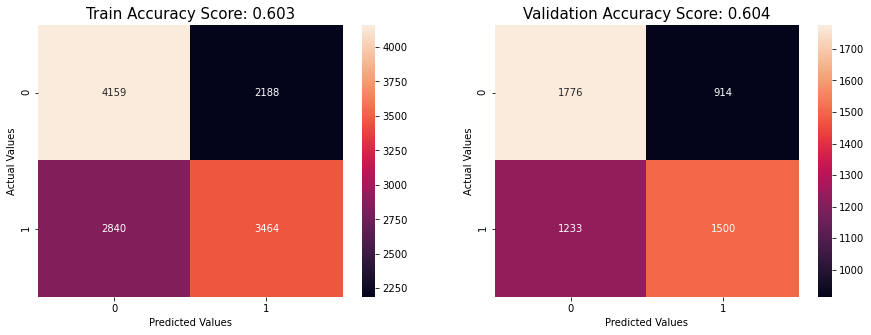

In [58]:
# Confusion Matrix

predictions = log_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = log_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### Random Forest

In [59]:
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [60]:
y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc = roc_auc_score(y_train, y_train_preds) 
rf_train_accuracy = accuracy_score(y_train, (y_train_preds>0.5))
rf_train_recall = recall_score(y_train, (y_train_preds>0.5))
rf_train_precision = precision_score(y_train, (y_train_preds>0.5))
rf_train_fscore = f1_score(y_train, (y_train_preds>0.5))
print('AUC:  ', rf_train_auc)
print('accuracy:  ', rf_train_accuracy)
print('recall:  ',rf_train_recall)
print('precision:  ',rf_train_precision)
print('fscore:   ',rf_train_fscore)
print('Validation:')
rf_val_auc = roc_auc_score(y_val, y_val_preds)
rf_val_accuracy = accuracy_score(y_val, (y_val_preds>0.5))
rf_val_recall = recall_score(y_val, (y_val_preds>0.5))
rf_val_precision = precision_score(y_val, (y_val_preds>0.5))
rf_val_fscore = f1_score(y_val, (y_val_preds>0.5))
print('AUC:  ', rf_val_auc)
print('accuracy:  ', rf_val_accuracy)
print('recall:  ', rf_val_precision)
print('fscore:   ', rf_val_fscore)

Random Forest
Training:
AUC:   0.6483827094858357
accuracy:   0.610149395304719
recall:   0.641497461928934
precision:   0.6021441334127456
fscore:    0.6211981566820276
Validation:
AUC:   0.6429302739340322
accuracy:   0.6079660704407155
recall:   0.6068285814853924
fscore:    0.6185862935055615


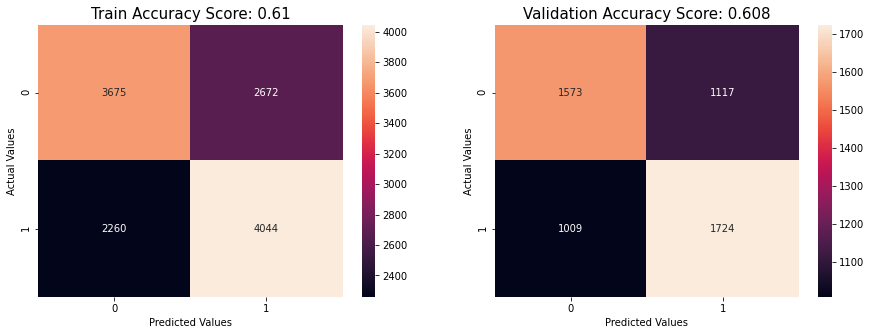

In [61]:
predictions = random_forest_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = random_forest_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### xgb

In [62]:
xgb_model = XGBClassifier(random_state=42, n_jobs=-1,max_depth=3)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:

print("XGBOOST")
y_train_preds = xgb_model.predict_proba(X_train)[:,1]
y_val_preds = xgb_model.predict_proba(X_val)[:,1]

print('Training:')

xgb_train_auc = roc_auc_score(y_train, y_train_preds) 
xgb_train_accuracy = accuracy_score(y_train, (y_train_preds>0.5))
xgb_train_recall = recall_score(y_train, (y_train_preds>0.5))
xgb_train_precision = precision_score(y_train, (y_train_preds>0.5))
xgb_train_fscore = f1_score(y_train, (y_train_preds>0.5))
print('AUC:  ', xgb_train_auc)
print('accuracy:  ', xgb_train_accuracy)
print('recall:  ',xgb_train_recall)
print('precision:  ',xgb_train_precision)
print('fscore:   ',xgb_train_fscore)
print('Validation:')
xgb_val_auc = roc_auc_score(y_val, y_val_preds)
xgb_val_accuracy = accuracy_score(y_val, (y_val_preds>0.5))
xgb_val_recall = recall_score(y_val, (y_val_preds>0.5))
xgb_val_precision = precision_score(y_val, (y_val_preds>0.5))
xgb_val_fscore = f1_score(y_val, (y_val_preds>0.5))
print('AUC:  ', xgb_val_auc)
print('accuracy:  ', xgb_val_accuracy)
print('recall:  ', xgb_val_precision)
print('fscore:   ', xgb_val_fscore)

XGBOOST
Training:
AUC:   0.6862739771137729
accuracy:   0.6337048454667615
recall:   0.6502220812182741
precision:   0.6279105392156863
fscore:    0.6388715710723192
Validation:
AUC:   0.6491508167420906
accuracy:   0.6160796607044071
recall:   0.6151397240891404
fscore:    0.6255395683453238


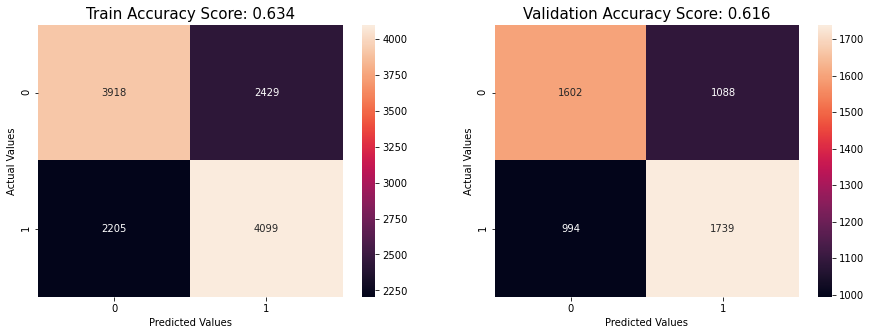

In [64]:
# Confusion Matrix

predictions = xgb_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = xgb_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)
plt.show()

### lightgbm

In [65]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state = 42,max_depth=3)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=3,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [66]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print("LGBM")
print('Training:')
lgbm_train_auc = roc_auc_score(y_train, y_train_preds) 
lgbm_train_accuracy = accuracy_score(y_train, (y_train_preds>0.5))
lgbm_train_recall = recall_score(y_train, (y_train_preds>0.5))
lgbm_train_precision = precision_score(y_train, (y_train_preds>0.5))
lgbm_train_fscore = f1_score(y_train, (y_train_preds>0.5))
print('AUC:  ', lgbm_train_auc)
print('accuracy:  ', lgbm_train_accuracy)
print('recall:  ',lgbm_train_recall)
print('precision:  ',lgbm_train_precision)
print('fscore:   ',lgbm_train_fscore)
print('Validation:')
lgbm_val_auc = roc_auc_score(y_val, y_val_preds)
lgbm_val_accuracy = accuracy_score(y_val, (y_val_preds>0.5))
lgbm_val_recall = recall_score(y_val, (y_val_preds>0.5))
lgbm_val_precision = precision_score(y_val, (y_val_preds>0.5))
lgbm_val_fscore = f1_score(y_val, (y_val_preds>0.5))
print('AUC:  ', lgbm_val_auc)
print('accuracy:  ', lgbm_val_accuracy)
print('recall:  ', lgbm_val_precision)
print('fscore:   ', lgbm_val_fscore)

LGBM
Training:
AUC:   0.6869276393819695
accuracy:   0.6348114773535689
recall:   0.6513324873096447
precision:   0.6289828431372549
fscore:    0.6399625935162095
Validation:
AUC:   0.6486446121138174
accuracy:   0.6158952609256869
recall:   0.6152482269503546
fscore:    0.6248874482261841


Text(0.5, 1.0, 'Validation Accuracy Score: 0.616')

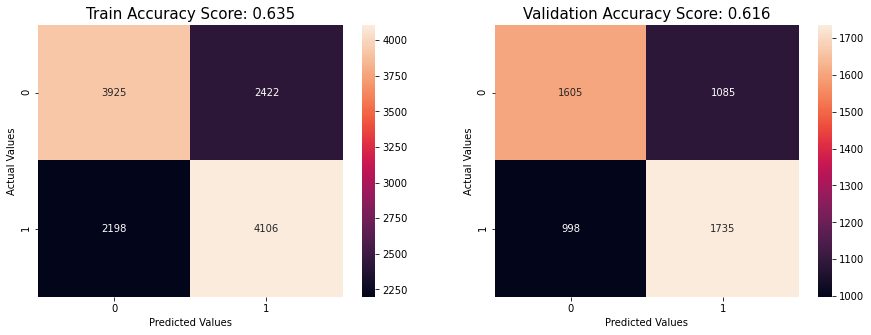

In [67]:
# Confusion Matrix

predictions = lgbm_model.predict(X_train)
train_score = round(accuracy_score(y_train, predictions), 3)
cm_train = cm(y_train, predictions)

predictions = lgbm_model.predict(X_val)
val_score = round(accuracy_score(y_val, predictions), 3)
cm_val = cm(y_val, predictions)

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,5)) 
sns.heatmap(cm_train, annot=True, fmt=".0f",ax=ax1)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values')
ax1.set_title('Train Accuracy Score: {0}'.format(train_score), size = 15)
sns.heatmap(cm_val, annot=True, fmt=".0f",ax=ax2)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values')
ax2.set_title('Validation Accuracy Score: {0}'.format(val_score), size = 15)

## Feature Importance


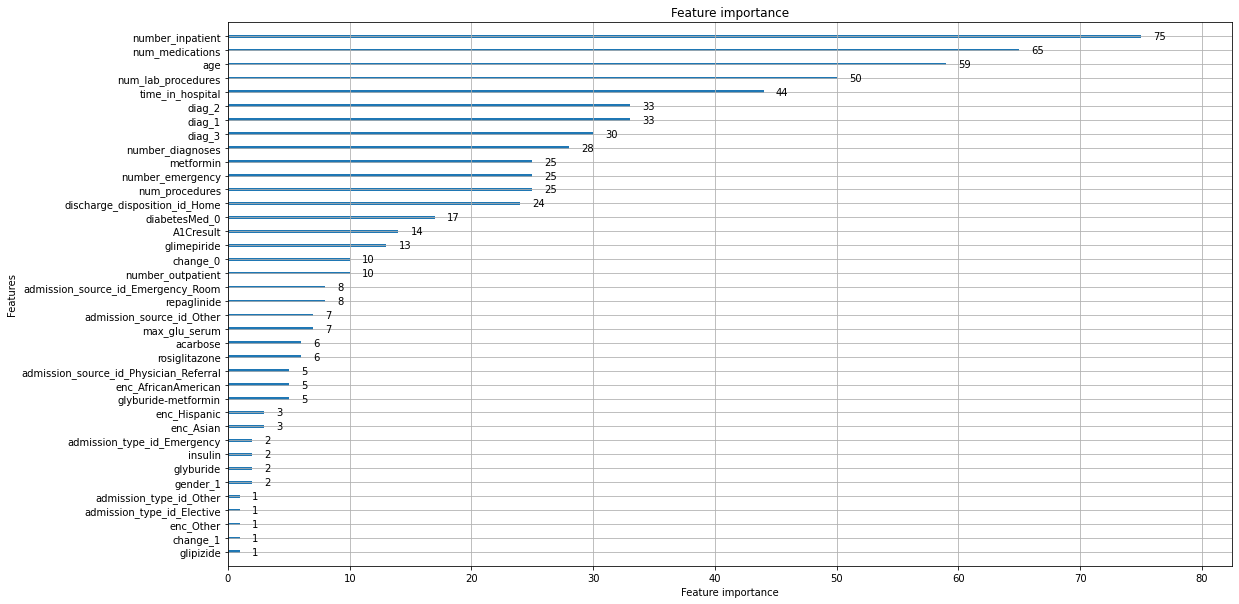

In [68]:
import lightgbm as lgb

plt.rcParams["figure.figsize"] = (18, 10)
lgb.plot_importance(lgbm_model)

feature_imp = pd.Series(lgbm_model.feature_importances_, index = X_train.columns)
best_features = feature_imp.nlargest(25)

In [69]:
X_train_importance = X_train[best_features.index]
X_val_importance = X_val[best_features.index]
X_test_importance = X_test[best_features.index]

### Training after feature importance

In [ ]:
lgbm=LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate":[0.01,0.1,0.05],
              "n_estimators": [100,200,500],
               "subsample":[0.1,0.2],
              "max_depth":[2,3,5,8]}

In [ ]:
lgbm_cv_model=GridSearchCV(lgbm,lgbm_params,cv=3,n_jobs=-1,verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  1.3min finished


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.1}

In [ ]:
lgbm_tuned=LGBMClassifier(learning_rate=0.1,max_depth=2,n_estimators=200,subsample= 0.1).fit(X_train_importance, y_train)

In [ ]:
y_train_preds = lgbm_model.predict_proba(X_train)[:,1]
y_val_preds = lgbm_model.predict_proba(X_val)[:,1]

print('Baseline LGBM')
lgbm_train_auc_base = roc_auc_score(y_train, y_train_preds)
lgbm_val_auc_base = roc_auc_score(y_val, y_val_preds)

print('Training AUC:%.3f'%(lgbm_train_auc_base))
print('Validation AUC:%.3f'%(lgbm_val_auc_base))

print('Optimized LGBM')
y_train_preds_lgbm = lgbm_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_lgbm = lgbm_tuned.predict_proba(X_val_importance)[:,1]

lgbm_train_auc = roc_auc_score(y_train, y_train_preds_lgbm)
lgbm_val_auc = roc_auc_score(y_val, y_val_preds_lgbm)

print('Training AUC:%.3f'%(lgbm_train_auc))
print('Validation AUC:%.3f'%(lgbm_val_auc))

Baseline LGBM
Training AUC:0.687
Validation AUC:0.649
Optimized LGBM
Training AUC:0.675
Validation AUC:0.650


In [ ]:
!pip install catboost

     |████████████████████████████████| 66.3MB 56kB/s 


In [ ]:
from catboost import CatBoostClassifier
catb=CatBoostClassifier()

In [ ]:
catb_params={"iterations":[200,500,1000],
            "learning_rate":[0.05,0.1],
            "depth":[4,5,8],
           }

In [ ]:
catb_cv_model=GridSearchCV(catb,catb_params, cv=3, n_jobs=-1,  verbose=2).fit(X_train_importance,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.7min finished


0:	learn: 0.6901667	total: 54.9ms	remaining: 27.4s
1:	learn: 0.6875017	total: 60.4ms	remaining: 15s
2:	learn: 0.6849644	total: 66.2ms	remaining: 11s
3:	learn: 0.6828171	total: 72.7ms	remaining: 9.02s
4:	learn: 0.6807840	total: 82.1ms	remaining: 8.13s
5:	learn: 0.6791794	total: 88.8ms	remaining: 7.31s
6:	learn: 0.6773523	total: 95.5ms	remaining: 6.73s
7:	learn: 0.6759893	total: 102ms	remaining: 6.24s
8:	learn: 0.6748593	total: 108ms	remaining: 5.89s
9:	learn: 0.6737981	total: 115ms	remaining: 5.61s
10:	learn: 0.6727266	total: 121ms	remaining: 5.38s
11:	learn: 0.6717785	total: 128ms	remaining: 5.19s
12:	learn: 0.6707197	total: 133ms	remaining: 4.99s
13:	learn: 0.6696771	total: 139ms	remaining: 4.81s
14:	learn: 0.6689146	total: 145ms	remaining: 4.69s
15:	learn: 0.6680176	total: 150ms	remaining: 4.55s
16:	learn: 0.6674492	total: 157ms	remaining: 4.45s
17:	learn: 0.6669972	total: 163ms	remaining: 4.36s
18:	learn: 0.6661987	total: 169ms	remaining: 4.27s
19:	learn: 0.6656763	total: 174ms	rema

In [ ]:
catb_cv_model.best_params_

{'depth': 4, 'iterations': 500, 'learning_rate': 0.05}

In [ ]:
catb_tuned =CatBoostClassifier(depth=5,iterations=200,learning_rate=0.05).fit(X_train_importance, y_train)

0:	learn: 0.6900661	total: 7.12ms	remaining: 1.42s
1:	learn: 0.6871763	total: 15.3ms	remaining: 1.52s
2:	learn: 0.6849519	total: 23.3ms	remaining: 1.53s
3:	learn: 0.6828116	total: 30.9ms	remaining: 1.51s
4:	learn: 0.6808008	total: 38.6ms	remaining: 1.5s
5:	learn: 0.6787597	total: 45.9ms	remaining: 1.48s
6:	learn: 0.6770455	total: 53.4ms	remaining: 1.47s
7:	learn: 0.6758093	total: 60.7ms	remaining: 1.46s
8:	learn: 0.6746384	total: 68.4ms	remaining: 1.45s
9:	learn: 0.6734743	total: 75.8ms	remaining: 1.44s
10:	learn: 0.6721828	total: 82.9ms	remaining: 1.42s
11:	learn: 0.6711339	total: 89.7ms	remaining: 1.41s
12:	learn: 0.6698476	total: 95.9ms	remaining: 1.38s
13:	learn: 0.6688904	total: 103ms	remaining: 1.37s
14:	learn: 0.6676830	total: 111ms	remaining: 1.37s
15:	learn: 0.6668695	total: 118ms	remaining: 1.36s
16:	learn: 0.6662971	total: 125ms	remaining: 1.35s
17:	learn: 0.6653481	total: 133ms	remaining: 1.34s
18:	learn: 0.6646179	total: 140ms	remaining: 1.34s
19:	learn: 0.6638671	total: 1

In [ ]:


print('Optimized CATBOOST')
y_train_preds_catb = catb_tuned.predict_proba(X_train_importance)[:,1]
y_val_preds_catb = catb_tuned.predict_proba(X_val_importance)[:,1]

catb_train_auc = roc_auc_score(y_train, y_train_preds_catb)
catb_val_auc = roc_auc_score(y_val, y_val_preds_catb)

print('Training AUC:%.3f'%(catb_train_auc))
print('Validation AUC:%.3f'%(catb_val_auc))

Optimized CATBOOST
Training AUC:0.699
Validation AUC:0.654


## choosing best model

In [ ]:
classifiers = [
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    yproba = cls.predict_proba(X_test_importance)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table.sort_values('auc',ascending=False,inplace=True)

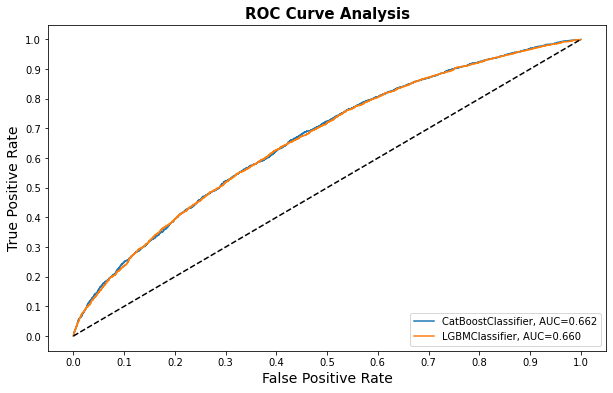

In [ ]:
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=14)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [ ]:

def test_scores(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    
    return auc, accuracy, recall


classifiers = [ 
                lgbm_tuned,
                catb_tuned]

# Define a result table as a DataFrame
test_result = pd.DataFrame(columns=['classifiers', 'accuracy','recall','auc'])

# Train the models and record the results
for cls in classifiers:
    y_test_preds = cls.predict_proba(X_test_importance)[:,1]
    
    test_auc, test_accuracy, test_recall = test_scores(y_test,y_test_preds, 0.5) # thresh = 0.5
    
    test_result = test_result.append({'classifiers':cls.__class__.__name__,
                                        'accuracy':test_accuracy, 
                                        'recall':test_recall, 
                                        'auc':test_auc}, ignore_index=True)


# Set name of the classifiers as index labels
test_result.set_index('classifiers', inplace=True)
test_result.sort_values('auc',ascending=False,inplace=True)

In [ ]:
test_result

,accuracy,recall,auc
classifiers,,,
CatBoostClassifier,0.614324,0.601669,0.661523
LGBMClassifier,0.607479,0.622310,0.659988


Conclusion: Going by this,i would use catboost_classifier